In [58]:
import numpy as np 
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
import statsmodels.api as sm
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier

In [30]:
df = pd.read_csv('result_after.csv')

### Data Preprocessing

In [31]:
## drop cols
drop_col = ['innings_x', 'innings_y', 'season', 'ground', 'scorecard_no', 'runs', 'overs', 'bat_first_country', 'field_first_country', 'country_won', 'countries']
df_all = df.drop(drop_col, axis=1)
# df_all
## drop country == ICC World XI, there is no this country anymore
# indexAge = df_all[ (df_all['countries'] == 'ICC World XI')].index
# df_all.drop(indexAge , inplace=True)
df_all

,team1_inn1,team2_inn1,first_inn_lead_of_team1,team1_inn2,team2_inn2,team1_inn1_over,team2_inn1_over,total_day,bat_first,field_first,team_no,won
0,245,0,49.0,104,0,169.3,0.0,5,1,0,1,1
1,0,196,-49.0,0,108,0.0,136.1,5,0,0,2,0
2,122,0,-139.0,259,0,112.1,0.0,5,1,0,1,0
3,0,261,139.0,0,122,0.0,130.2,5,0,0,2,1
4,113,0,-143.0,160,0,54.0,0.0,3,1,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
5007,0,255,-183.0,0,76,0.0,115.4,5,0,1,1,2
5008,166,0,-410.0,188,0,48.4,0.0,4,1,0,1,0
5009,0,576,410.0,0,0,0.0,134.0,4,0,0,2,1
5010,283,0,-12.0,395,0,54.4,0.0,5,0,0,1,1


#### See the importance of features
all df

In [55]:
df = df.dropna()
X_imp = df.loc[:, df.columns != 'won']
Y_imp = df['won']
X_imp = X_imp.drop(['innings_x', 'innings_y'], axis=1)
X_imp.dtypes

ground                      object
season                      object
scorecard_no                object
countries                   object
runs                       float64
overs                      float64
team1_inn1                   int64
team2_inn1                   int64
first_inn_lead_of_team1    float64
team1_inn2                   int64
team2_inn2                   int64
team1_inn1_over            float64
team2_inn1_over            float64
total_day                    int64
bat_first                    int64
field_first                  int64
bat_first_country           object
field_first_country         object
team_no                      int64
country_won                 object
dtype: object

In [56]:
labelencoder = LabelEncoder()
label_col = ['ground', 'season', 'scorecard_no', 'countries', 'bat_first_country', 'field_first_country' , 'country_won']
X_imp[label_col] = X_imp[label_col].apply(LabelEncoder().fit_transform)
# X_imp.dtypes

Feature: 0, Score: -0.00029
Feature: 1, Score: -0.00079
Feature: 2, Score: -0.00000
Feature: 3, Score: -0.02403
Feature: 4, Score: -0.00101
Feature: 5, Score: 0.00111
Feature: 6, Score: 0.00123
Feature: 7, Score: 0.00123
Feature: 8, Score: 0.00104
Feature: 9, Score: 0.00076
Feature: 10, Score: -0.00031
Feature: 11, Score: 0.00015
Feature: 12, Score: 0.00096
Feature: 13, Score: 0.03204
Feature: 14, Score: -0.12619
Feature: 15, Score: 0.12633
Feature: 16, Score: -0.02466
Feature: 17, Score: -0.03962
Feature: 18, Score: -0.06574
Feature: 19, Score: 0.15055


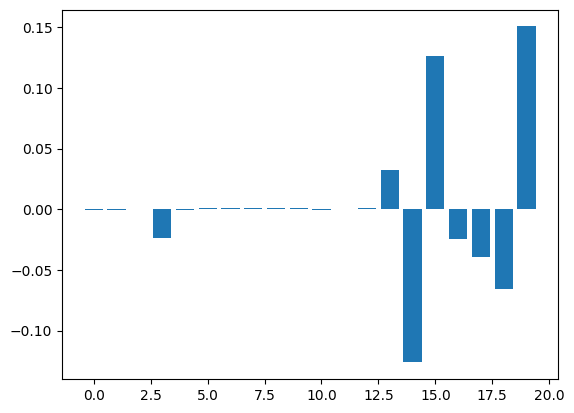

In [57]:
## Define importance of each features
# define the model
model = LinearRegression()
# fit the model
model.fit(X_imp, Y_imp)
# get importance
importance = model.coef_
# summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

## Binomial Logistic regression

In [15]:
# df_one_hot = pd.get_dummies(df_all, columns = ['countries'], dtype=int)
# df_one_hot

In [16]:
df_bi = df_all[df_all['won'] != 2]
df_bi

,team1_inn1,team2_inn1,first_inn_lead_of_team1,team1_inn2,team2_inn2,team1_inn1_over,team2_inn1_over,total_day,bat_first,field_first,team_no,won
0,245,0,49.0,104,0,169.3,0.0,5,1,0,1,1
1,0,196,-49.0,0,108,0.0,136.1,5,0,0,2,0
2,122,0,-139.0,259,0,112.1,0.0,5,1,0,1,0
3,0,261,139.0,0,122,0.0,130.2,5,0,0,2,1
4,113,0,-143.0,160,0,54.0,0.0,3,1,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
5003,0,461,149.0,0,133,0.0,121.2,5,0,0,2,1
5008,166,0,-410.0,188,0,48.4,0.0,4,1,0,1,0
5009,0,576,410.0,0,0,0.0,134.0,4,0,0,2,1
5010,283,0,-12.0,395,0,54.4,0.0,5,0,0,1,1


In [17]:
X = df_bi.loc[:, df_bi.columns != 'won']
Y = df_bi['won']
X

,team1_inn1,team2_inn1,first_inn_lead_of_team1,team1_inn2,team2_inn2,team1_inn1_over,team2_inn1_over,total_day,bat_first,field_first,team_no
0,245,0,49.0,104,0,169.3,0.0,5,1,0,1
1,0,196,-49.0,0,108,0.0,136.1,5,0,0,2
2,122,0,-139.0,259,0,112.1,0.0,5,1,0,1
3,0,261,139.0,0,122,0.0,130.2,5,0,0,2
4,113,0,-143.0,160,0,54.0,0.0,3,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...
5003,0,461,149.0,0,133,0.0,121.2,5,0,0,2
5008,166,0,-410.0,188,0,48.4,0.0,4,1,0,1
5009,0,576,410.0,0,0,0.0,134.0,4,0,0,2
5010,283,0,-12.0,395,0,54.4,0.0,5,0,0,1


In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 1)
# X_train["countries"].unique() 
X_test

,team1_inn1,team2_inn1,first_inn_lead_of_team1,team1_inn2,team2_inn2,team1_inn1_over,team2_inn1_over,total_day,bat_first,field_first,team_no
1335,622,0,465.0,336,0,167.5,0.0,5,1,0,1
1508,0,326,-267.0,0,0,0.0,89.0,6,0,0,1
351,397,0,-20.0,351,0,180.5,0.0,8,1,0,1
3367,401,0,-6.0,375,0,115.1,0.0,5,1,0,2
105,0,237,-314.0,0,96,0.0,100.1,5,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
3418,0,264,21.0,0,216,0.0,84.1,5,0,0,1
4729,0,166,-250.0,0,171,0.0,55.2,4,0,0,2
1390,0,142,-107.0,0,252,0.0,58.0,6,0,0,2
4471,0,315,-223.0,0,244,0.0,110.3,5,0,0,2


In [19]:
y_test.value_counts()

won
1    538
0    499
Name: count, dtype: int64

#### P-values for logistic regression
1. Alternative Hypothesis (H1): The features that are important for predicting won (won and lost).
2. Null Hypothesis (H0): The features that have no relationship to churn. <br>
- The p-values < 0.05 gives evidence to reject the null hypothesis (there is no relationship between input & output).

In [20]:
X_train = sm.add_constant(X_train)
log_reg_model = sm.Logit(y_train, X_train)
log_reg_model = log_reg_model.fit()
print(log_reg_model.summary())

Optimization terminated successfully.
         Current function value: 0.273266
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                    won   No. Observations:                 2417
Model:                          Logit   Df Residuals:                     2405
Method:                           MLE   Df Model:                           11
Date:                Thu, 28 Sep 2023   Pseudo R-squ.:                  0.6057
Time:                        00:29:45   Log-Likelihood:                -660.48
converged:                       True   LL-Null:                       -1675.0
Covariance Type:            nonrobust   LLR p-value:                     0.000
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.1449      0.426      0.340      0.734      -0.689   

## Multinomial Logistic regression

In [21]:
df_mnl = df_all
## drop nan
df_mnl = df_mnl.dropna()
X_mnl = df_mnl.loc[:, df_bi.columns != 'won']
Y_mnl = df_mnl['won']
X_mnl_train, X_mnl_test, y_mnl_train, y_mnl_test = train_test_split(X_mnl, Y_mnl, test_size = 0.3, random_state = 1)

In [22]:
df_mnl.isnull().sum()

team1_inn1                 0
team2_inn1                 0
first_inn_lead_of_team1    0
team1_inn2                 0
team2_inn2                 0
team1_inn1_over            0
team2_inn1_over            0
total_day                  0
bat_first                  0
field_first                0
team_no                    0
won                        0
dtype: int64

In [23]:
X_mnl_train = sm.add_constant(X_mnl_train)
mnl_log_reg_model = sm.MNLogit(y_mnl_train, X_mnl_train)
mnl_log_reg_model = mnl_log_reg_model.fit()
print(mnl_log_reg_model.summary())

Optimization terminated successfully.
         Current function value: 0.688422
         Iterations 7
                          MNLogit Regression Results                          
Dep. Variable:                    won   No. Observations:                 3507
Model:                        MNLogit   Df Residuals:                     3483
Method:                           MLE   Df Model:                           22
Date:                Thu, 28 Sep 2023   Pseudo R-squ.:                  0.3727
Time:                        00:29:45   Log-Likelihood:                -2414.3
converged:                       True   LL-Null:                       -3848.6
Covariance Type:            nonrobust   LLR p-value:                     0.000
                  won=1       coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.0794      0.374      0.212      0.832      -0.654   

### Analysis

- used seaborn to analyse the target 
- see how many categories that needed to be predicted on with Distribution

C:\Users\ashpl\AppData\Local\Temp\ipykernel_38528\2571088616.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_all.won)


<Axes: xlabel='won', ylabel='Density'>

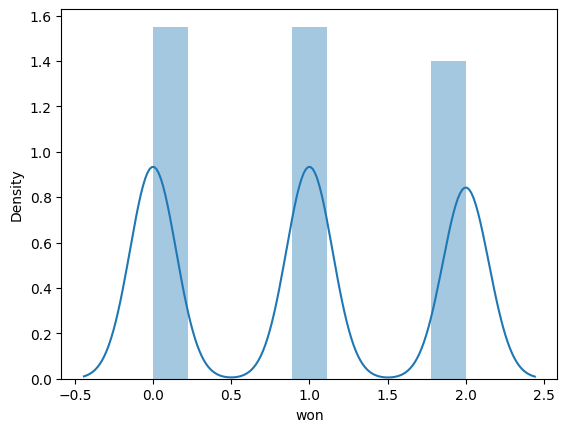

In [26]:
sns.distplot(df_all.won)

- creating a heatmap of the label and features 
- see the features that do not have a high correlation to each other

<Axes: >

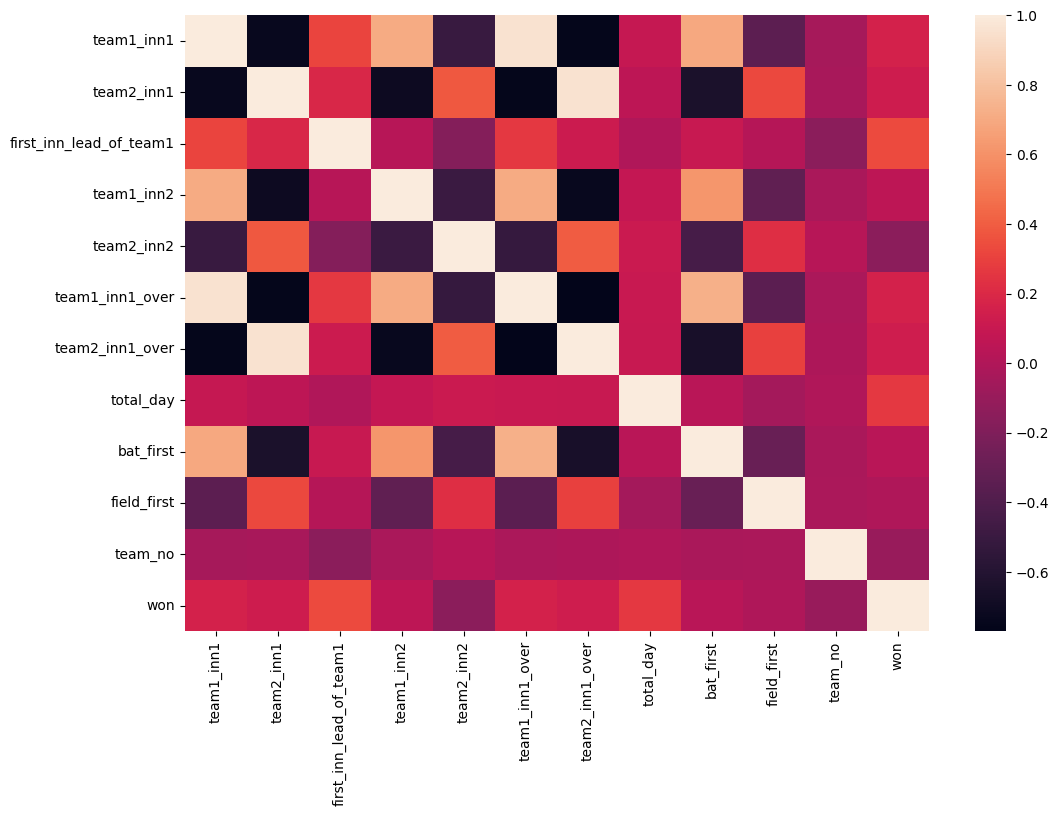

In [28]:
plt.figure(figsize=(12,8))
cmap = df_all.corr()
sns.heatmap(cmap)

##### Then try and see >> normalise, standardise >> use cross validation to see which way is better

In [ ]:
# clf = LogisticRegression(solver='newton-cg', multi_class='multinomial')
# scores = cross_val_score(clf, trainX, trainY, cv=5)
# scores 

##### confusion matrix, to see the accuracy

In [ ]:
# confusion_matrix = confusion_matrix(testY, y_pred)
# print(confusion_matrix)
# plt.matshow(confusion_matrix, cmap=plt.cm.gray)
# plt.show()

##### calculate the probabilities


In [ ]:
# probability = log_reg.predict_proba(testX)
# probability

## make it readable
# df = pd.DataFrame(log_reg.predict_proba(testX), columns=log_reg.classes_)
# df.head()